In [66]:
import scipy.integrate as integrate
import scipy.special as special
import sympy as sym
from sympy import *

In [67]:
# Since the given pdf(f_X(x)) is symmetric around x=0, so we will consider a symmetric quantizer. 
# We need three thresholds(d_i) and 2 respresentation levels y_i for this. 
# We are designing a uniform quatizer so all d_i = d and we will call it step size

x = sym.Symbol('x')
d = sym.Symbol('d')

## Interior deteroriation calculation
Din1 = ((x-(d/2))**2)*sym.exp(-x/3)*(1/6)
I1 = sym.integrate(Din1, (x, 0, d))
Din2 = ((x-(3*d/2))**2)*sym.exp(-x/3)*(1/6)
I2 = sym.integrate(Din2, (x, d, 2*d))
Din = 2*(I1+I2)
print("Inner Distortion:")
sym.simplify(Din)
# print(latex(sym.simplify(Din)))

Inner Distortion:


(-6.0*d*exp(2*d/3) + (0.25*d**2 - 3.0*d + 18.0)*exp(d) - (0.25*d**2 + 3.0*d + 18.0)*exp(d/3))*exp(-d)

In [68]:
## exterior deteroriation calculation
D01 = (x- 3*d/2)**2 *sym.exp(-x/3)*(1/6)
Dout = 2*sym.integrate(D01, (x, 2*d,sym.oo))
print("Outer Distortion:")
sym.simplify(Dout)
# print(latex(sym.simplify(Dout)))

Outer Distortion:


(0.25*d**2 + 3.0*d + 18.0)*exp(-2*d/3)

In [69]:
## Total deteroriation calculation
Dtotal = sym.simplify(Din+Dout)
print("Total Distortion:")
sym.simplify(Dtotal)
# print(latex(sym.simplify(Dtotal)))

Total Distortion:


0.25*d**2 - 3.0*d - 6.0*d*exp(-d/3) + 18.0

The value of optimal step size d: 0.7905790579057906
The value of distortion at optimal step size d: 16.883402359501012


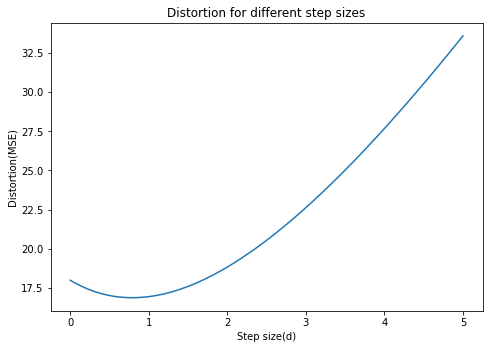

In [87]:
### Plot the value of distortion for different values of d to find the optimal value of d
import numpy as np
import matplotlib.pyplot as plt
d = np.linspace(0.0,5.0,10000)
plotd = 0.25*d**2 + 3.0*d -6.0*d*np.exp(-d/3.0) +18.0
dopt = d[np.argmin(plotd)]
print(f"The value of optimal step size d: {dopt}")
print(f"The value of distortion at optimal step size d: {min(plotd)}")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(d, plotd) # solid line with yellow colour and square marker
ax.set_title("Distortion for different step sizes")
ax.set_xlabel('Step size(d)')
ax.set_ylabel('Distortion(MSE)')
plt.show()

In [88]:
# Since the given pdf is symmetric around x=0, so we will consider a symmetric quantizer. 
# We need three thresholds and 2 respresentation levels y_i for this. 
# Let say de is the step size as calculated above


xi = [[i*dopt for i in z] for z in [[0],[1],[2]]]
yi = [[(i-0.5)*dopt for i in z] for z in [[1],[2]]]
Dtotal = 0.25*dopt**2 - 3.0*dopt -6.0*dopt*math.exp(-dopt/3.0)+18.0
print(f"The optimal quantization pts are: {yi}")
print(f"The decision boundaries are: {xi}")
print(f"Distortion achieved by the optimal quantizer {Dtotal}")


The optimal quantization pts are: [[0.3952895289528953], [1.185868586858686]]
The decision boundaries are: [[0.0], [0.7905790579057906], [1.5811581158115813]]
Distortion achieved by the optimal quantizer 12.139928012066267


In [71]:
## Let's minimize total distortion with respect to the value of d
## Let's differentiate Df w.r.t d
# Dtotal_dd = sym.diff(Dtotal, d)
# sym.simplify(Dtotal_dd)
# print(latex(sym.simplify(Dtotal_dd)))

(2.0*d + (0.5*d - 3.0)*exp(d/3) - 6.0)*exp(-d/3)

In [22]:
## Equating Df_dd with zero we get 
# import math
# dnext = lambda d: 6+ (12-4*d)/math.exp(d/3)

# ### We will solve this iteratively now
# d0 = math.log(4)/math.sqrt(2) 
# d1 = dnext(d0) ## The optimal quatization step size
# print(d1)


11.82705283900893


In [49]:
# Since the given pdf is symmetric around x=0, so we will consider a symmetric quantizer. 
# We need three thresholds and 2 respresentation levels y_i for this. 
# Let say de is the step size as calculated above

# de = d1
# xi = [[i*de for i in z] for z in [[0],[1],[2]]]
# yi = [[(i-0.5)*de for i in z] for z in [[1],[2]]]
# Dtotal = 0.25*de**2 - 3.0*de -6.0*de*math.exp(-de/3.0)+18.0
# print(f"The optimal quantization pts are: {yi}")
# print(f"The decision boundaries are: {xi}")
# print(f"Distortion achieved by the optimal quantizer {Dtotal}")


The optimal quantization pts are: [[5.913526419504465], [17.740579258513396]]
The decision boundaries are: [[0.0], [11.82705283900893], [23.65410567801786]]
Distortion achieved by the optimal quantizer 16.111786524208554
